<a href="https://colab.research.google.com/github/karljmurphy/logistic_regression/blob/master/Logistic_regression_on_iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()
import seaborn as sns

In [0]:
dataset = pd.read_csv('iris2.csv')
inputs = dataset.iloc[:, 1: 5].values
outputs = dataset.iloc[:, 5].values

In [52]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Data exploration**

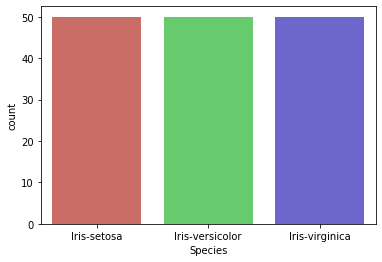

<Figure size 432x288 with 0 Axes>

In [58]:
sns.countplot(x='Species', data=dataset, palette='hls')
plt.show()
plt.savefig('count-plot')

In [60]:
dataset.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


Observations:


*   Sepal Width variable may not be a great predictor of the class but petal width may be a good predictor variable








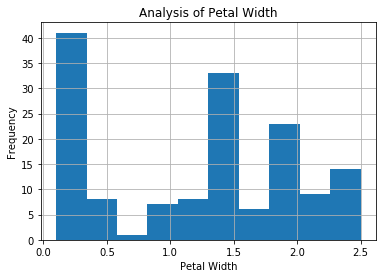

In [73]:
dataset.PetalWidthCm.hist()
plt.title('Analysis of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.savefig('hist_petal_width')

**To inspect how the inputs and outputs look - uncomment and run the next** 


In [0]:
#print(inputs)
#print(outputs)

**Uncomment the following to view the encoded outputs**

In [0]:
label_encoder_y = LabelEncoder()
encoded_outputs = label_encoder_y.fit_transform(outputs)

In [0]:
#print (encoded_outputs)

**Split the dataset into the Training set and Test set**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(inputs, encoded_outputs, test_size = 0.25, random_state = 0)

**Feature Scaling**
What is feature scaling about? - [link text](https://medium.com/datadriveninvestor/feature-scaling-why-what-where-how-683f61812f4c)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#print (x_train)

**Fit the classifier to the training set** [link text](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Predict against test set**

In [0]:
y_pred = classifier.predict(x_test)

**Create the confusion matrix**

What is this telling us? It is telling us what our Logistis Regression classifier predicted (on the test set). So, taking one example of the box that says 13. This is saying our model predicted 13 test set records were class 0 and these 13 records were classified correctly (note the test set has an actual output or class value for each record). We compare what we predicted against each actual output value on the test set).

Look at the box marked 1. This is telling us that the actual class the flower belonged to was 1 but we predicted that the test set record belonged to class 2.



Text(0.5, 257.44, 'Predicted label')

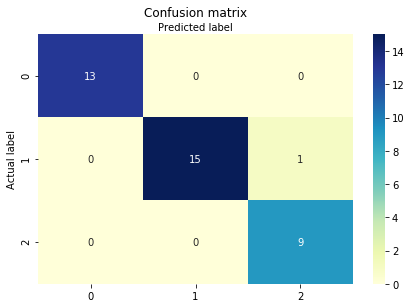

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')